<a href="https://colab.research.google.com/github/GenAIUnplugged/tensorflow_series/blob/main/CNN_Architecture_Raw_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values from 0-255 to 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the input layer
input_tensor = layers.Input(shape=(28, 28))

# Flatten the input image
x = layers.Flatten()(input_tensor)

# Add a dense layer with ReLU activation
x = layers.Dense(128, activation='relu')(x)

# Add a dropout layer for regularization
x = layers.Dropout(0.2)(x)

# Add the output layer with softmax activation for 10 classes
output_tensor = layers.Dense(10, activation='softmax')(x)

# Create the functional model
model = models.Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8624 - loss: 0.4706
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9553 - loss: 0.1492
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9670 - loss: 0.1086
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9732 - loss: 0.0869
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9783 - loss: 0.0707
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.0877
Test accuracy: 0.9790999889373779


In [5]:
import skimage.data
import numpy
import sys

In [25]:
img=skimage.data.chelsea()
print(img.shape)
img=skimage.color.rgb2gray(img)
print(img.shape)

(300, 451, 3)
(300, 451)


In [22]:
img.shape

(300, 451)

<ipython-input-7-9fdd9852de9e>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(img)


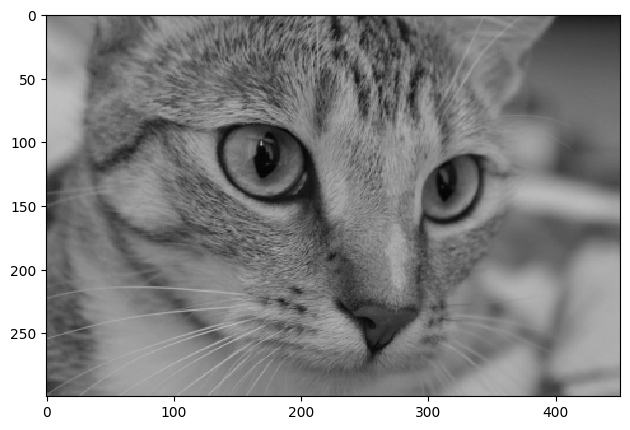

In [7]:
skimage.io.imshow(img)
number_of_filters=10
filter_dimension=3
l1_filter=numpy.random.random((number_of_filters,filter_dimension,filter_dimension))

In [26]:
l1_filter

array([[[0.83566043, 0.3356577 , 0.69195626],
        [0.51724714, 0.14867089, 0.72150317],
        [0.06656909, 0.75896166, 0.08256995]],

       [[0.52635577, 0.49194304, 0.24393348],
        [0.30998883, 0.85290922, 0.99359585],
        [0.89457557, 0.86520051, 0.7280927 ]],

       [[0.27874775, 0.46233559, 0.86038184],
        [0.46532889, 0.25772738, 0.6701719 ],
        [0.63999191, 0.03003518, 0.41511438]],

       [[0.67061451, 0.32620106, 0.27792982],
        [0.84869889, 0.67563497, 0.61593242],
        [0.77751004, 0.85874427, 0.7991537 ]],

       [[0.4419983 , 0.83334007, 0.94200913],
        [0.55215232, 0.59106887, 0.00855774],
        [0.53243552, 0.40920442, 0.73391402]],

       [[0.77785071, 0.86242361, 0.40487303],
        [0.44349269, 0.27358939, 0.41184494],
        [0.4862916 , 0.47385144, 0.13808982]],

       [[0.30861281, 0.26306366, 0.63972264],
        [0.18044732, 0.87787697, 0.7171701 ],
        [0.47633884, 0.10900598, 0.54523345]],

       [[0.15993596,

In [31]:
l1_filter.shape

(10, 3, 3)

In [9]:
def my_conv(img,conv_filter):
  filter_num=conv_filter.shape[0]
  filter_size=conv_filter.shape[1]
  feature_map=numpy.zeros((img.shape[0]-filter_size+1,img.shape[1]-filter_size+1,filter_num))
  for i in range(filter_num):
    print('Filter Number:'+str(i+1))
    conv_filter_mul=conv_filter[i,:,:]

    for r in range(0,img.shape[0]-filter_size+1):
      for c in range(0,img.shape[1]-filter_size+1):
        center_pix=numpy.sum(img[r:(r + filter_size),c:(c + filter_size)] * conv_filter_mul)
        feature_map[r,c,i]=center_pix

  return feature_map

In [10]:
l1_feature_map=my_conv(img,l1_filter)

Filter Number:1
Filter Number:2
Filter Number:3
Filter Number:4
Filter Number:5
Filter Number:6
Filter Number:7
Filter Number:8
Filter Number:9
Filter Number:10


In [32]:
l1_feature_map.shape

(298, 449, 10)

In [11]:
l1_feature_map[0]

array([[2.03681428, 2.91896315, 1.99983193, ..., 2.70482281, 2.62795734,
        1.70841076],
       [2.02012349, 2.88844759, 1.98529896, ..., 2.67642904, 2.60395188,
        1.69396722],
       [2.00548467, 2.86800075, 1.97298273, ..., 2.65674789, 2.58072917,
        1.67678521],
       ...,
       [0.51491374, 0.73911647, 0.50549869, ..., 0.68310067, 0.66765533,
        0.43358211],
       [0.50837387, 0.72922301, 0.49863596, ..., 0.67334823, 0.65467284,
        0.42870422],
       [0.50737817, 0.73282164, 0.4987801 , ..., 0.6760682 , 0.65094635,
        0.42673499]])

<ipython-input-12-94b14ffe91cc>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(l1_feature_map[0])
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


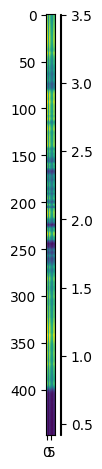

In [12]:
skimage.io.imshow(l1_feature_map[0])

In [13]:
l1_feature_map[0]

array([[2.03681428, 2.91896315, 1.99983193, ..., 2.70482281, 2.62795734,
        1.70841076],
       [2.02012349, 2.88844759, 1.98529896, ..., 2.67642904, 2.60395188,
        1.69396722],
       [2.00548467, 2.86800075, 1.97298273, ..., 2.65674789, 2.58072917,
        1.67678521],
       ...,
       [0.51491374, 0.73911647, 0.50549869, ..., 0.68310067, 0.66765533,
        0.43358211],
       [0.50837387, 0.72922301, 0.49863596, ..., 0.67334823, 0.65467284,
        0.42870422],
       [0.50737817, 0.73282164, 0.4987801 , ..., 0.6760682 , 0.65094635,
        0.42673499]])

<ipython-input-14-1d59d93eb728>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(l1_feature_map[1])
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


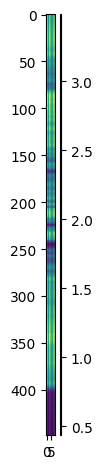

In [14]:
skimage.io.imshow(l1_feature_map[1])

In [15]:
l1_feature_map[1]

array([[2.07703639, 2.97892072, 2.04032782, ..., 2.75981773, 2.68254919,
        1.74452373],
       [2.05562128, 2.94475579, 2.01999675, ..., 2.7268363 , 2.64981791,
        1.72715907],
       [2.04283773, 2.92445919, 2.00515575, ..., 2.70698505, 2.62828349,
        1.710676  ],
       ...,
       [0.53064212, 0.76362945, 0.52197579, ..., 0.70711207, 0.68495548,
        0.4489204 ],
       [0.52760588, 0.76189839, 0.51939189, ..., 0.7025842 , 0.67774085,
        0.44544425],
       [0.53441034, 0.77190244, 0.52520669, ..., 0.71344177, 0.68473767,
        0.4479412 ]])

In [19]:
l1_feature_map

array([[[2.03681428, 2.91896315, 1.99983193, ..., 2.70482281,
         2.62795734, 1.70841076],
        [2.02012349, 2.88844759, 1.98529896, ..., 2.67642904,
         2.60395188, 1.69396722],
        [2.00548467, 2.86800075, 1.97298273, ..., 2.65674789,
         2.58072917, 1.67678521],
        ...,
        [0.51491374, 0.73911647, 0.50549869, ..., 0.68310067,
         0.66765533, 0.43358211],
        [0.50837387, 0.72922301, 0.49863596, ..., 0.67334823,
         0.65467284, 0.42870422],
        [0.50737817, 0.73282164, 0.4987801 , ..., 0.6760682 ,
         0.65094635, 0.42673499]],

       [[2.07703639, 2.97892072, 2.04032782, ..., 2.75981773,
         2.68254919, 1.74452373],
        [2.05562128, 2.94475579, 2.01999675, ..., 2.7268363 ,
         2.64981791, 1.72715907],
        [2.04283773, 2.92445919, 2.00515575, ..., 2.70698505,
         2.62828349, 1.710676  ],
        ...,
        [0.53064212, 0.76362945, 0.52197579, ..., 0.70711207,
         0.68495548, 0.4489204 ],
        [0.5